In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Lab 1

In [2]:
dataset_file = '../datasets/USArrests.csv'
seed = 1

data = pd.read_csv(dataset_file, index_col='State')
data.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
print(f'\tMeans:\n{data.mean()}')
print(f'\n\tVars:\n{data.std() ** 2}')

	Means:
Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

	Vars:
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


In [4]:
data = (data - data.mean()) / data.std()

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA().fit(data)

In [7]:
loadings = pd.DataFrame(pca.components_.T, index=data.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [8]:
scores = pca.transform(data)
scores.shape

(50, 4)

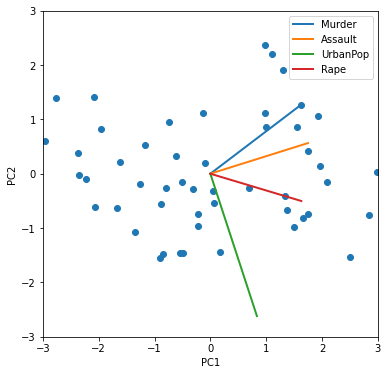

In [9]:
plt.figure(figsize=[6, 6])
plt.scatter(scores[:, 0], scores[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
for feature in loadings.index:
    plt.plot([0, loadings['PC1'][feature] * 3], [0, loadings['PC2'][feature] * 3], lw=2, label=feature)
plt.legend(loc='upper right')

In [10]:
var = scores.std(axis=0) ** 2
pve = var / var.sum()
pve

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

Text(0.5, 1.0, 'Cumulative  Proportion  of Variance  Explained')

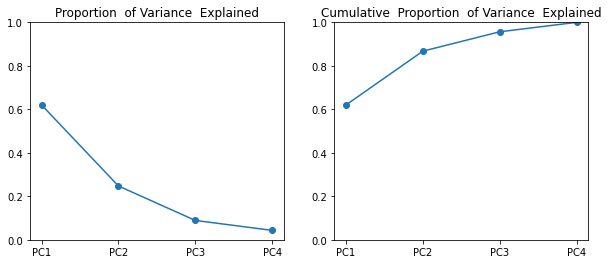

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=[10, 4])
plt.sca(axes[0])
plt.plot(np.arange(1, 5), pve, 'o-')
plt.xticks(np.arange(1, 5), labels=loadings.columns)
plt.ylim(0, 1)
plt.title('Proportion  of Variance  Explained')

plt.sca(axes[1])
plt.plot(np.arange(1, 5), pve.cumsum(), 'o-')
plt.xticks(np.arange(1, 5), labels=loadings.columns)
plt.ylim(0, 1)
plt.title('Cumulative  Proportion  of Variance  Explained')

# Lab 2

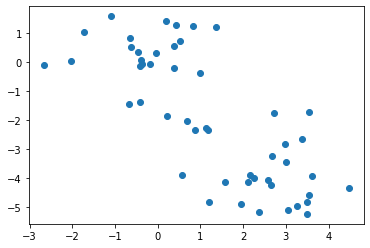

In [50]:
seed = 2
np.random.seed(seed)
X = np.random.normal(size=100).reshape(50, 2)
X[:25, 0] = X[:25, 0] + 3
X[:25, 1] = X[:25, 1] - 4
plt.scatter(X[:, 0], X[:, 1])

In [51]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

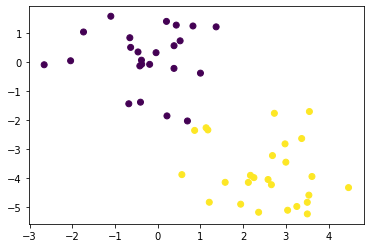

In [52]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)

Clusters means:
[[ 1.72794239 -2.36932903]
 [-0.30258511  0.33731239]
 [ 2.74924851 -4.40059558]]

Sum of squares: 69.917


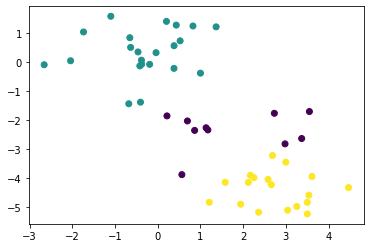

In [53]:
km = KMeans(n_clusters=3, n_init=1, init='random', random_state=seed)
clusters = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
print(f'Clusters means:\n{km.cluster_centers_}')
print(f'\nSum of squares: {km.inertia_:.3f}')

Clusters means:
[[ 0.72954539 -1.97251836]
 [ 2.82805911 -4.11351797]
 [-0.34608792  0.5592591 ]]

Sum of squares: 69.307


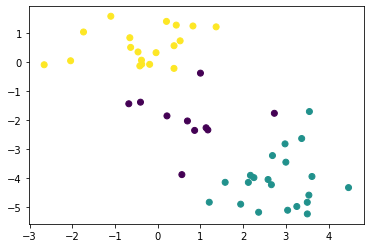

In [54]:
km = KMeans(n_clusters=3, n_init=20, init='random', random_state=seed)
clusters = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
print(f'Clusters means:\n{km.cluster_centers_}')
print(f'\nSum of squares: {km.inertia_:.3f}')

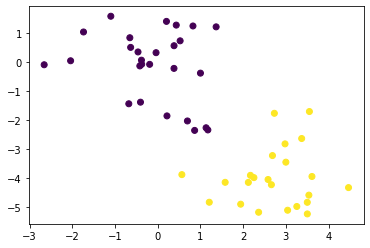

In [55]:
hc = AgglomerativeClustering(n_clusters=2, linkage='complete')
clusters = hc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)

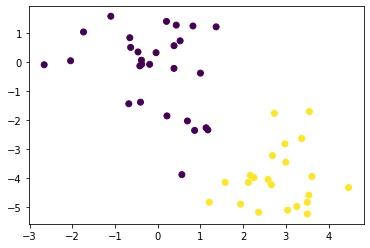

In [57]:
hc = AgglomerativeClustering(n_clusters=2, linkage='average')
clusters = hc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)

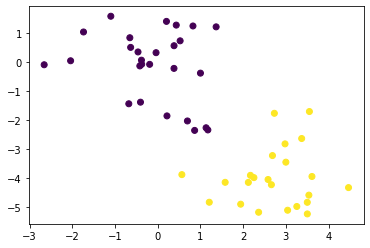

In [58]:
hc = AgglomerativeClustering(n_clusters=2, linkage='single')
clusters = hc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)

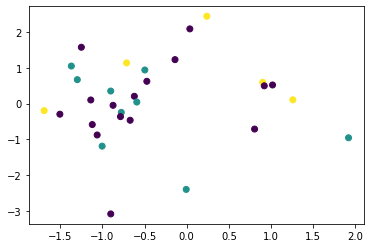

In [61]:
X_triple = np.random.normal(size=90).reshape(30, 3)
hc_corr = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
clusters = hc_corr.fit_predict(np.corrcoef(X_triple))
plt.scatter(X_triple[:, 0], X_triple[:, 1], c=clusters)

# Lab 3

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
dataset_file = '../datasets/NCI60_Ross.csv'
seed = 1

data = pd.read_csv(dataset_file, index_col=0)
data.drop(['Unigene ID'], axis=1, inplace=True)
data = data.transpose()
types = LabelEncoder().fit_transform([name.split('_')[0] for name in data.index])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, BREAST_BT549 to RENAL_UO31
Columns: 1375 entries, 61539 to 512164
dtypes: float64(1375)
memory usage: 645.0+ KB


Text(0, 0.5, 'PC3')

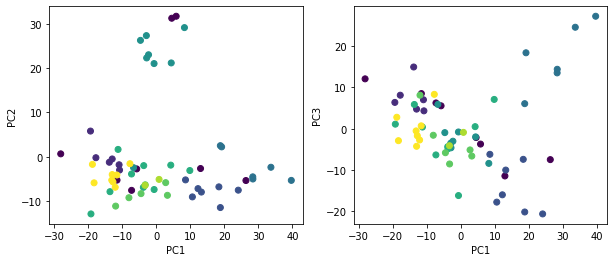

In [111]:
data = data / data.std()
pca = PCA().fit(data)
loadings = pd.DataFrame(pca.components_.T, index=data.columns, columns=[f'PC{i+1}'for i in range(pca.components_.shape[0])])
scores = pca.transform(data)

fig, axes = plt.subplots(ncols=2, figsize=[10, 4])

plt.sca(axes[0])
plt.scatter(scores[:, 0], scores[:, 1], c=types)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.sca(axes[1])
plt.scatter(scores[:, 0], scores[:, 2], c=types)
plt.xlabel('PC1')
plt.ylabel('PC3')

In [114]:
var = scores.std(axis=0) ** 2
pve = var / var.sum()
pve

array([1.59052909e-01, 9.79272274e-02, 6.89806591e-02, 4.36167403e-02,
       3.83254709e-02, 3.40852403e-02, 3.03114826e-02, 2.72340318e-02,
       2.60954396e-02, 2.45939357e-02, 2.27331003e-02, 2.17825397e-02,
       1.92164521e-02, 1.75059582e-02, 1.68574055e-02, 1.62563241e-02,
       1.53554822e-02, 1.46671313e-02, 1.43680802e-02, 1.36522191e-02,
       1.34332468e-02, 1.27811834e-02, 1.24404464e-02, 1.19179022e-02,
       1.10852124e-02, 1.07994447e-02, 1.05641659e-02, 1.03546994e-02,
       1.01502224e-02, 9.41651859e-03, 8.95833778e-03, 8.43192875e-03,
       8.28505003e-03, 8.11023468e-03, 7.89024658e-03, 7.75592854e-03,
       7.39773475e-03, 7.28155793e-03, 6.94214216e-03, 6.79680889e-03,
       6.63433220e-03, 6.56145917e-03, 6.06198695e-03, 6.02168148e-03,
       5.87181685e-03, 5.74621224e-03, 5.19534393e-03, 5.07006773e-03,
       4.94810234e-03, 4.65778262e-03, 4.49456968e-03, 4.21529715e-03,
       4.16058967e-03, 3.85178810e-03, 3.57753005e-03, 3.47295150e-03,
      

Text(0.5, 1.0, 'Cumulative  Proportion  of Variance  Explained')

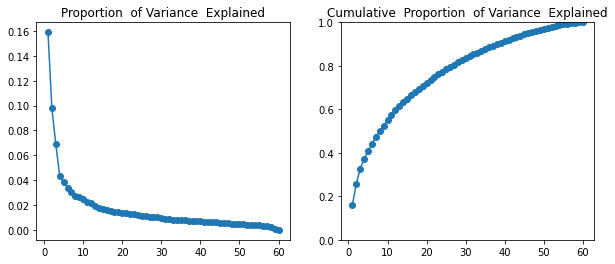

In [119]:
fig, axes = plt.subplots(ncols=2, figsize=[10, 4])
plt.sca(axes[0])
plt.plot(np.arange(loadings.shape[1])+1, pve, 'o-')
plt.title('Proportion  of Variance  Explained')

plt.sca(axes[1])
plt.plot(np.arange(loadings.shape[1])+1, pve.cumsum(), 'o-')
plt.ylim(0, 1)
plt.title('Cumulative  Proportion  of Variance  Explained')

In [150]:
from scipy.cluster import hierarchy

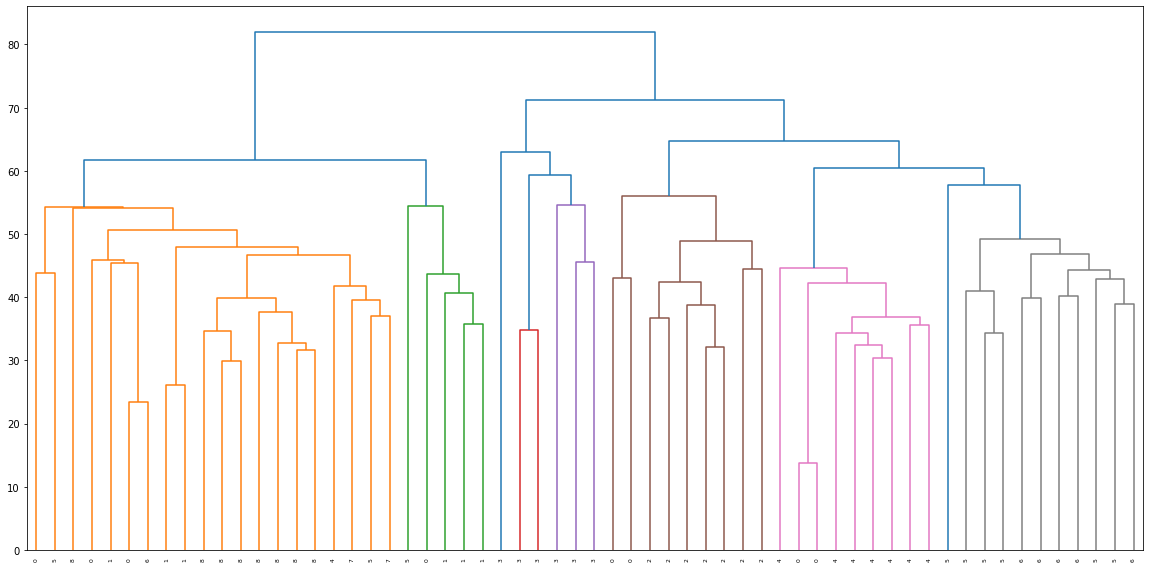

In [158]:
Z = hierarchy.linkage(data, 'complete')

plt.figure(figsize=[20,10])

dn = hierarchy.dendrogram(Z, labels=types)

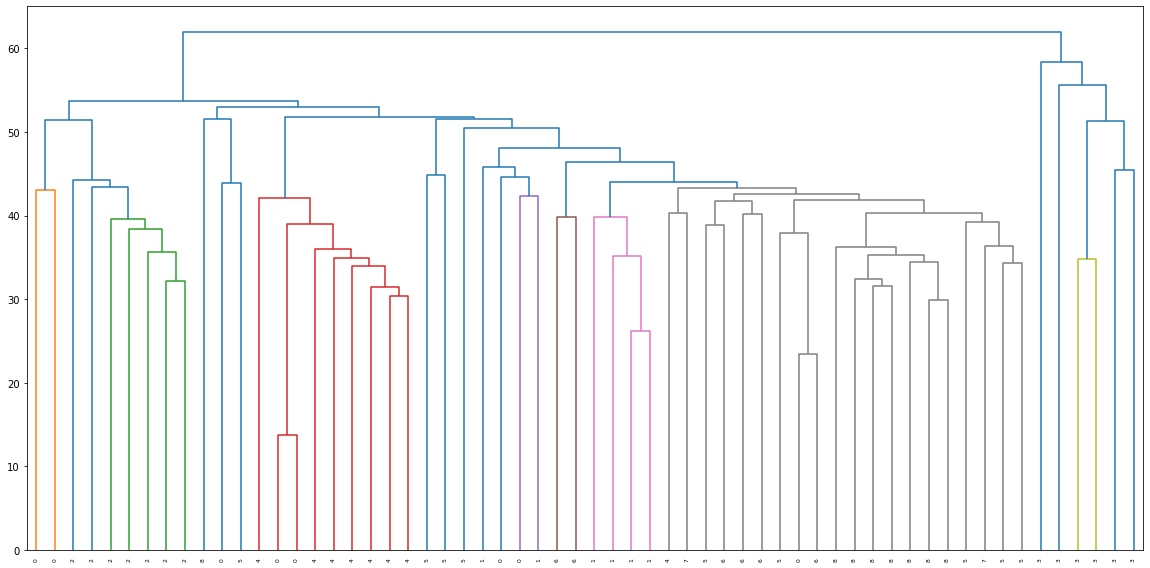

In [159]:
Z = hierarchy.linkage(data, 'average')

plt.figure(figsize=[20,10])

dn = hierarchy.dendrogram(Z, labels=types)

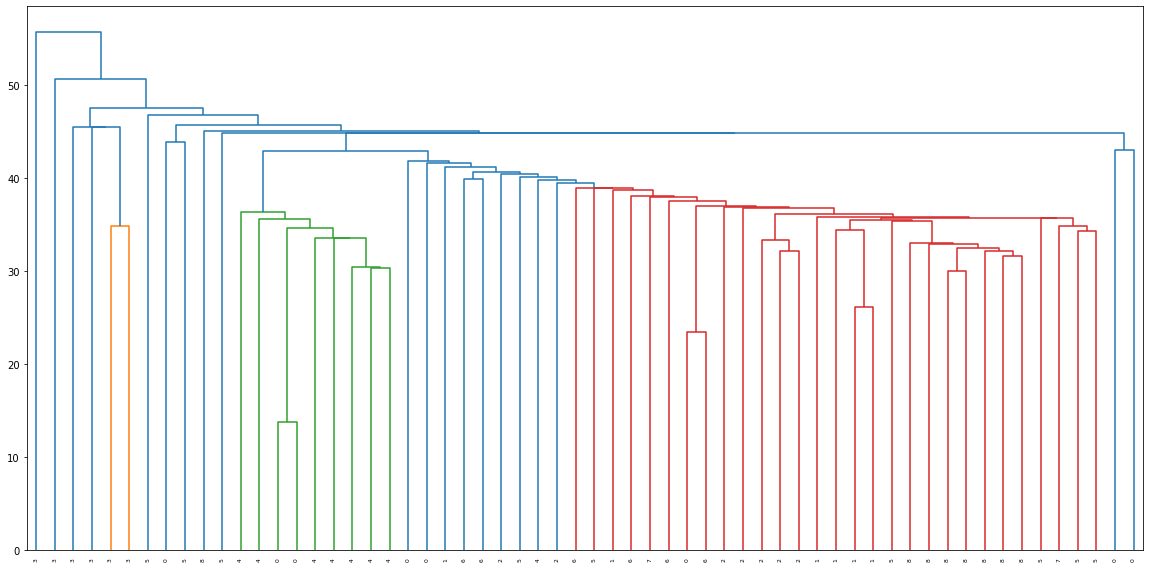

In [160]:
Z = hierarchy.linkage(data, 'single')

plt.figure(figsize=[20,10])

dn = hierarchy.dendrogram(Z, labels=types)